**1. Data Preparation:**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/heart_disease.xlsx')

In [3]:
# Display the first few rows of the dataset
print(df.head())

        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...



**2. Exploratory Data Analysis (EDA):**


In [4]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 age             0
Age in years    0
dtype: int64


In [5]:
# Summary statistics
print("\nSummary statistics:\n", df.describe())


Summary statistics:
            age                  Age in years
count       12                            12
unique      12                            12
top     Gender  Gender ; Male - 1, Female -0
freq         1                             1


In [6]:
# Data types
print("\nData types:\n", df.dtypes)


Data types:
 age             object
Age in years    object
dtype: object


In [7]:
# Visualizations

# Histograms
# Select only numerical features for histogram plotting
# Include 'object' type to check for potential numerical columns stored as strings
numerical_features = df.select_dtypes(include=['number', 'datetime', 'object'])

# Attempt to convert 'object' columns to numeric
for col in numerical_features.select_dtypes(include=['object']):
    try:
        numerical_features[col] = pd.to_numeric(numerical_features[col])
    except ValueError:
        print(f"Column '{col}' could not be converted to numeric.")

# Filter to only numerical and datetime features for plotting
numerical_features_to_plot = numerical_features.select_dtypes(include=['number', 'datetime'])


# Check if there are any numerical features to plot
if numerical_features_to_plot.empty:
    print("No numerical or datetime columns found for plotting.")
else:
    numerical_features_to_plot.hist(figsize=(15, 15))
    plt.show()

Column 'age' could not be converted to numeric.
Column 'Age in years' could not be converted to numeric.
No numerical or datetime columns found for plotting.


In [8]:
# Box plots
# Select only numerical features for box plot
numerical_features = df.select_dtypes(include=['number'])

# Check if there are numerical features to plot
if numerical_features.empty:
    print("No numerical columns found for plotting box plots.")
else:
    numerical_features.plot(kind='box', subplots=True, layout=(5, 5), sharex=False, sharey=False, figsize=(15, 15))
    plt.show()

No numerical columns found for plotting box plots.


In [9]:
# Correlation Matrix
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number'])

# Check if there are any numerical features to calculate correlation
if numerical_features.empty:
    print("No numerical columns found for correlation analysis.")
else:
    # Calculate the correlation matrix for numerical features
    correlation_matrix = numerical_features.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

No numerical columns found for correlation analysis.


In [10]:
# Check for outliers using boxplots for numerical features
numerical_features = df.select_dtypes(include=np.number)
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

**3. Feature Engineering:**

In [11]:
# Handle missing values (if any) -  replace with mean for numerical and most frequent for categorical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    elif df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())

In [12]:
# Import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

# Encode categorical features using Label Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [13]:
# Separate features (X) and target (y)
X = df.drop('Age in years', axis=1)  # Assuming 'target' is the column name for the target variable
y = df['Age in years']

In [14]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Scale numerical features using StandardScaler
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()  # Now StandardScaler is defined
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [15]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split

# Scale numerical features using StandardScaler
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()  # Now StandardScaler is defined
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

**4. Decision Tree Classification:**

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

In [17]:
print(X_train.head())
print(y_train.head())

         age
8   0.144841
5   0.434524
2   1.593255
1  -1.013890
11 -0.144841
8      4
5      7
2      3
1      1
11    10
Name: Age in years, dtype: int64


In [18]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Scale numerical features using StandardScaler
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()  # Now StandardScaler is defined
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed


# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42) # You can tune hyperparameters here
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

In [21]:
import warnings
warnings.filterwarnings("ignore")

# Evaluate the model
from sklearn.metrics import roc_auc_score # Import roc_auc_score

accuracy = accuracy_score(y_test, y_pred) # Now accuracy_score is defined
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))  # Now classification_report is defined

try:
    roc_auc = roc_auc_score(y_test, y_pred)  # Now roc_auc_score is defined
    print(f"ROC-AUC: {roc_auc}")
except ValueError:
    print("ROC AUC score could not be calculated. Please ensure the target variable has at least two classes")

Accuracy: 0.0
              precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

ROC AUC score could not be calculated. Please ensure the target variable has at least two classes


**5. Hyperparameter Tuning:**

In [22]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [24]:
# Import ShuffleSplit
from sklearn.model_selection import ShuffleSplit
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

# Use ShuffleSplit in GridSearchCV
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42) # Example values
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [25]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best Accuracy Score: 0.0


In [26]:
# Evaluate the best model on the test set
best_dt_classifier = grid_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



In [27]:
# Print the accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {accuracy}")


Accuracy on test set: 0.0


**6. Model Evaluation and Analysis:**

In [28]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.0
              precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

[[0 0 1 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]]


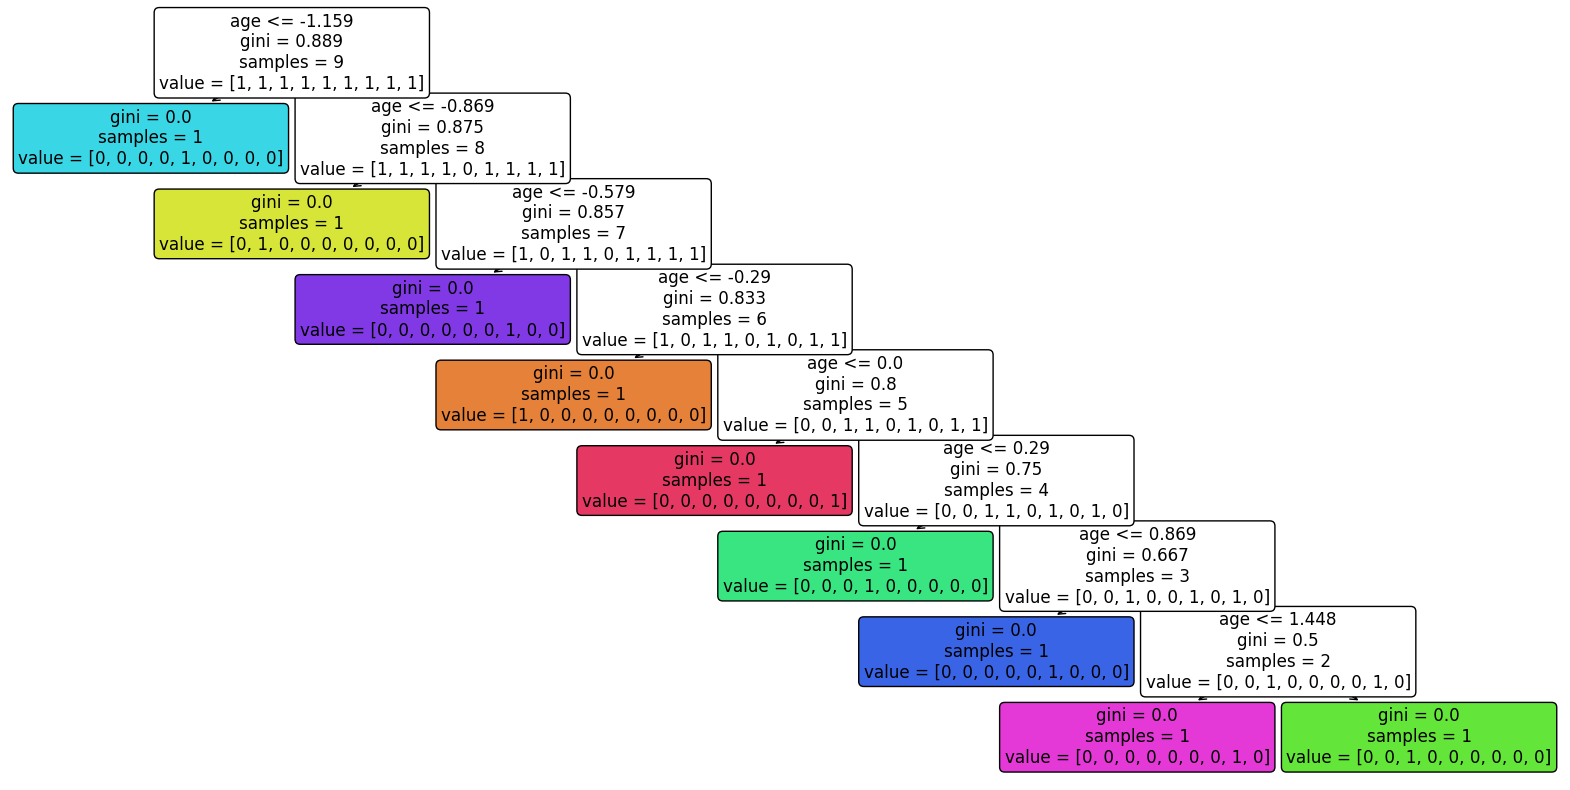

In [29]:
# Visualize the decision tree
import matplotlib.pyplot as plt # This line imports pyplot
from sklearn.tree import plot_tree # This line imports the necessary plot_tree function

plt.figure(figsize=(20, 10))
# Remove class_names argument as it's not relevant for regression
plot_tree(dt_classifier, feature_names=X.columns, filled=True, rounded=True)
plt.show()

**Interview Questions:**


**Q.1). What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

**max_depth:** Controls the maximum depth of the tree. A deeper tree can capture more intricate patterns but may lead to overfitting. A shallow tree may underfit.

**min_samples_split:** The minimum number of samples required to split an internal node. A larger value can prevent the model from learning too much detail, reducing overfitting.

**criterion:** The function used to measure the quality of a split (e.g., "gini" for Gini impurity or "entropy" for information gain). The choice of criterion affects how splits are made and thus the model’s behavior.

**min_samples_leaf:** The minimum number of samples required to be at a leaf node. Larger values prevent the tree from creating small, potentially unreliable leaves.

**max_features:** The maximum number of features to consider when looking for the best split. Limiting the number of features can help with overfitting, especially when the dataset has many features.



**Q.2). What is the difference between Label encoding and One-hot encoding?**


**Label Encoding:** In this approach, each unique category is assigned a number. For example, if the variable "Color" has categories "Red", "Blue", and "Green", Label Encoding might assign them as 1, 2, and 3. This is suitable for ordinal features, where the order of categories matters.

**One-Hot Encoding:** This method creates new binary columns for each category. For the "Color" example, it would create three new columns: Color_Red, Color_Blue, and Color_Green, each containing 0s or 1s. This is suitable for nominal features, where there is no inherent order among categories.
